# Customer Churn Prediction

# Problem Statement

Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts. We have to Churn Rate on the basis of their usage data.

# Metadata

customerID : Customer ID

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)


In [1]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting working directory
os.chdir('C:/Users/sagar/Documents/Class/Intro to Python/Final Project/Project')

#reading input file
customer_churn = pd.read_csv('Telco-Customer-Churn.csv')

#checking data dimensions of customer churn dataset
customer_churn.shape

(7043, 21)

In [3]:
#describing the columns in the customer churn data with various statistics
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
#return top 5 rows to have an overview
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#check the data types
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
def changedatatypes(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changedatatypes(customer_churn)

In [7]:
#change SeniorCitizen from integer to boolean
customer_churn['SeniorCitizen']=customer_churn['SeniorCitizen'].astype(bool)

In [8]:
#change TotalCharges from object to Numeric
customer_churn['TotalCharges']=pd.to_numeric(customer_churn['TotalCharges'],errors='coerce')

In [9]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,False,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,False,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,False,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

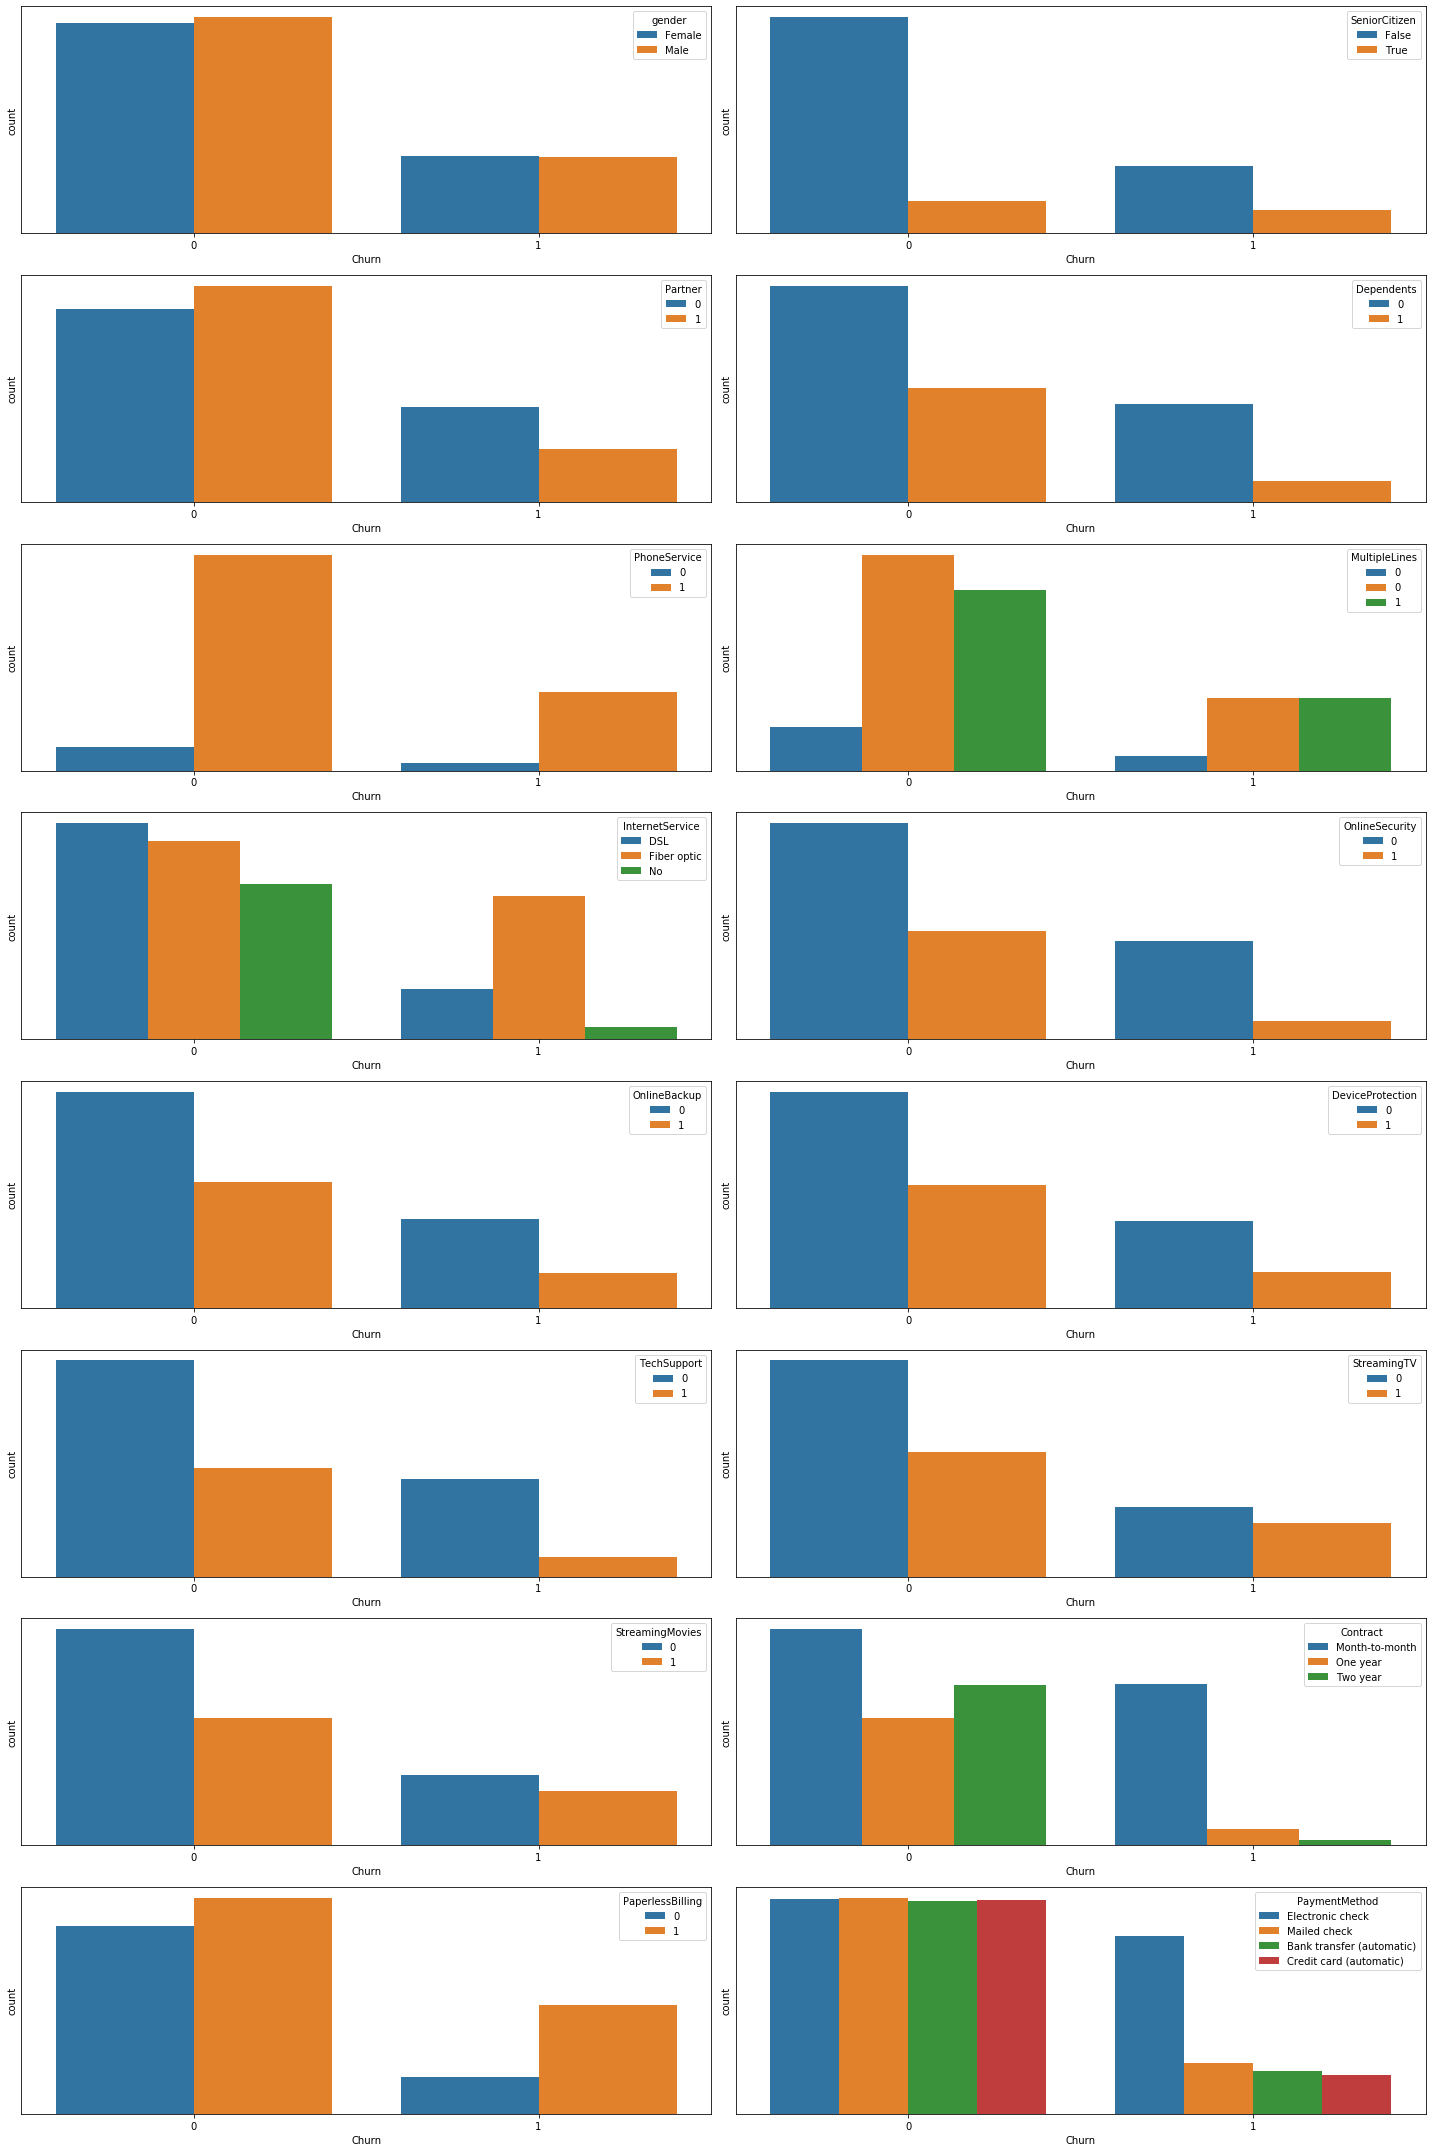

In [11]:
#data exploration for customer churn w.r.t other features
f, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 30))

sns.countplot(customer_churn["Churn"],hue = customer_churn["gender"],ax = axes[0,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["SeniorCitizen"],ax = axes[0,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["Partner"],ax = axes[1,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["Dependents"],ax = axes[1,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["PhoneService"],ax = axes[2,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["MultipleLines"],ax = axes[2,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["InternetService"],ax = axes[3,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["OnlineSecurity"],ax = axes[3,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["OnlineBackup"],ax = axes[4,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["DeviceProtection"],ax = axes[4,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["TechSupport"],ax = axes[5,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["StreamingTV"],ax = axes[5,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["StreamingMovies"],ax = axes[6,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["Contract"],ax = axes[6,1])
sns.countplot(customer_churn["Churn"],hue = customer_churn["PaperlessBilling"],ax = axes[7,0])
sns.countplot(customer_churn["Churn"],hue = customer_churn["PaymentMethod"],ax = axes[7,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

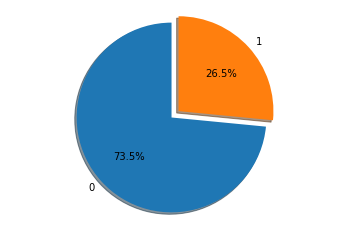

In [12]:
#pie chart for churn distribution
plt.pie(customer_churn["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=customer_churn["Churn"].unique())
plt.axis('equal') ;

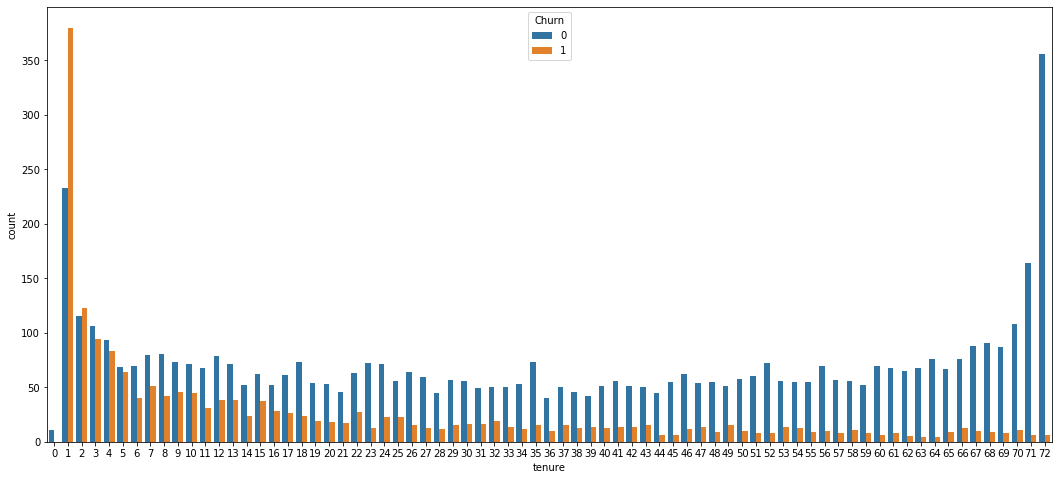

In [13]:
#customer churn with respect to tenure
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(customer_churn["tenure"],hue = customer_churn["Churn"]);

In [14]:
#to obtain unique categories in the required variables
print("Payment methods: ",customer_churn.PaymentMethod.unique())
print("Contract types: ",customer_churn.Contract.unique())
print("Gender: ",customer_churn.gender.unique())
print("Senior Citizen: ",customer_churn.SeniorCitizen.unique())
print("Internet Service Types: ",customer_churn.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [15]:
#changing the datatype to category
customer_churn['gender']=customer_churn['gender'].astype('category')
customer_churn['PaymentMethod']=customer_churn['PaymentMethod'].astype('category')
customer_churn['Contract']=customer_churn['Contract'].astype('category')
customer_churn['SeniorCitizen']=customer_churn['SeniorCitizen'].astype('category')
customer_churn['InternetService']=customer_churn['InternetService'].astype('category')
customer_churn.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [16]:
#check for missing values
customer_churn_missing = customer_churn.isnull().sum()
pctg_missing_values = customer_churn_missing/len(customer_churn)
pctg_missing_values.sort_values(ascending=False)

TotalCharges        0.001562
Churn               0.000000
OnlineSecurity      0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
customerID          0.000000
dtype: float64

In [17]:
#dropping missing columns
customer_churn = customer_churn.dropna() 

In [18]:
#count the number of duplicates
customer_churn.duplicated().sum()

0

In [19]:
# remove duplicates
customer_churn = customer_churn[~customer_churn.duplicated()] 

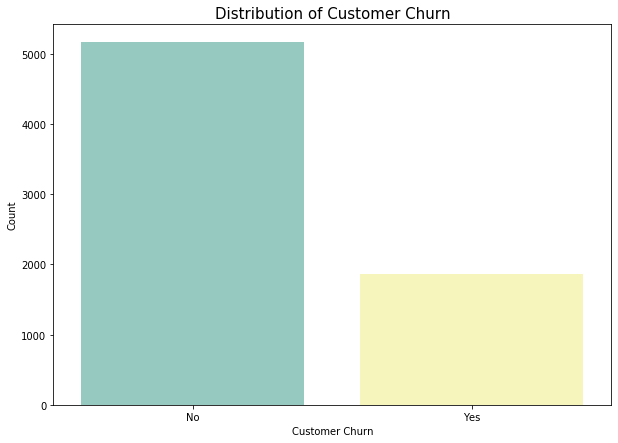

In [20]:
#distribution of customer churn
fig = plt.figure(figsize = (10,7))
ax=sns.countplot(x='Churn',palette="Set3", data=customer_churn)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
plt.title("Distribution of Customer Churn", fontsize=15)
plt.show()

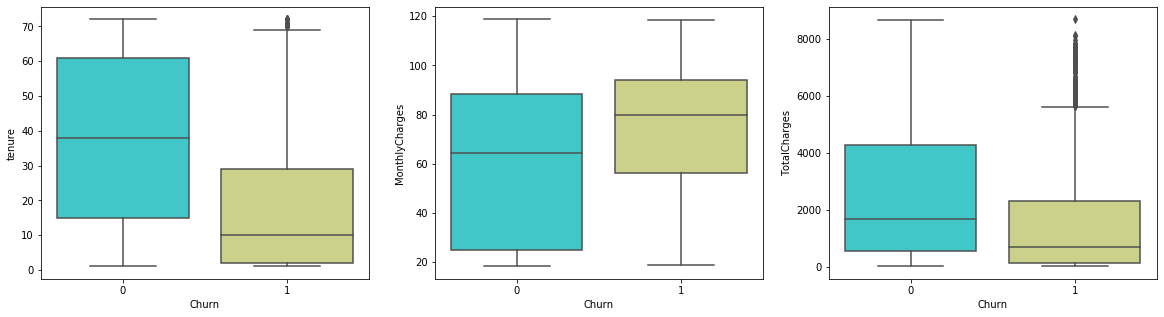

In [21]:
#plotting churn against numeric variables
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=customer_churn,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=customer_churn,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=customer_churn,palette='rainbow',ax = axes[2])

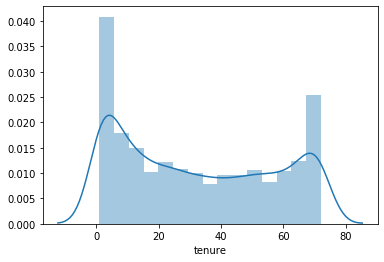

In [22]:
#distribution with kernel density estimation
sns.distplot(customer_churn.tenure);

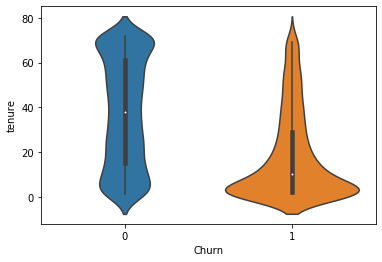

In [23]:
sns.violinplot(x="Churn", y="tenure", data=customer_churn);

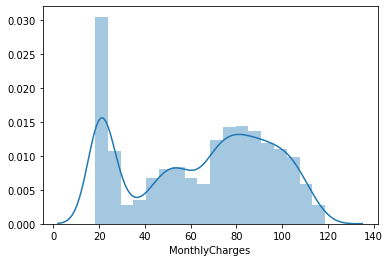

In [24]:
sns.distplot(customer_churn.MonthlyCharges);

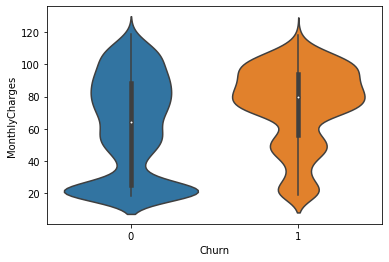

In [25]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=customer_churn);

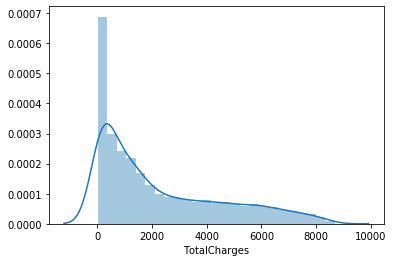

In [26]:
sns.distplot(customer_churn.TotalCharges);

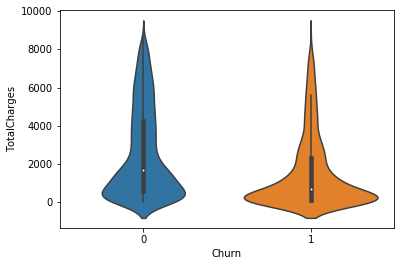

In [27]:
sns.violinplot(x="Churn", y="TotalCharges", data=customer_churn);

In [28]:
customer_churn.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [29]:
customer_churn['Churn'] = customer_churn['Churn'].astype(int)

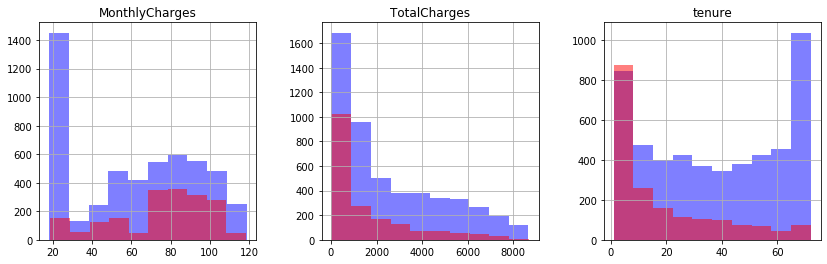

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
customer_churn[customer_churn.Churn == 0][["tenure", "MonthlyCharges", "TotalCharges"]].hist(color="blue", alpha=0.5, ax=ax)
customer_churn[customer_churn.Churn == 1][["tenure", "MonthlyCharges", "TotalCharges"]].hist(color="red", alpha=0.5, ax=ax)
plt.show()

# Key Insights
Males and Females are equally distributed for churn and non churn customers.

Majority of customers do not fall in seniority age group. We can see that proportion of senior customers churning is higher as compared to non churn senior customers.

If the customer has a partner then there is a less chance of him/her to churn while the customers without any partners tend to churn more frequently.

If the customer has any dependents then the chances of him/her churning reduces by 50%.

Customers with fibre optics internet service then there is high chance that they might churn, so we might need to further investigate this feature.

Month-to-Month based contractors tend to churn more when compared to the one-year and two-year contractors.

If the customer is opting for paperless billing then the chances of him/her churning are double.

Customers paying by electronic payment methods tend to churn significantly more than the customers using mailed check, bank transfer or credit card.

Therefore, there are chances that churn customers are not happy with paperless billing and electronic check payment services or customers using them tend to be change their telecom service provider more often than others.

Customers who have spent higher tenure with the company are less likely to churn while the customers with a tenure of less than 24 months are more likely to churn.

Customers with monthly charges more than 70$ are more likely to churn.

Customers with total charges less than 1000$ are more likely to churn.

Phone service, Multiple lines distribution, Streaming Movies, Streaming TV, Device Protection, Tech support and Online Backup aren't much of a factor to decide whether the customer will churn or not.